In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 보스턴 집 값 데이터 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

bostonDF =pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
bostonDF['PRICE'] = target
bostonDF.head()

c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


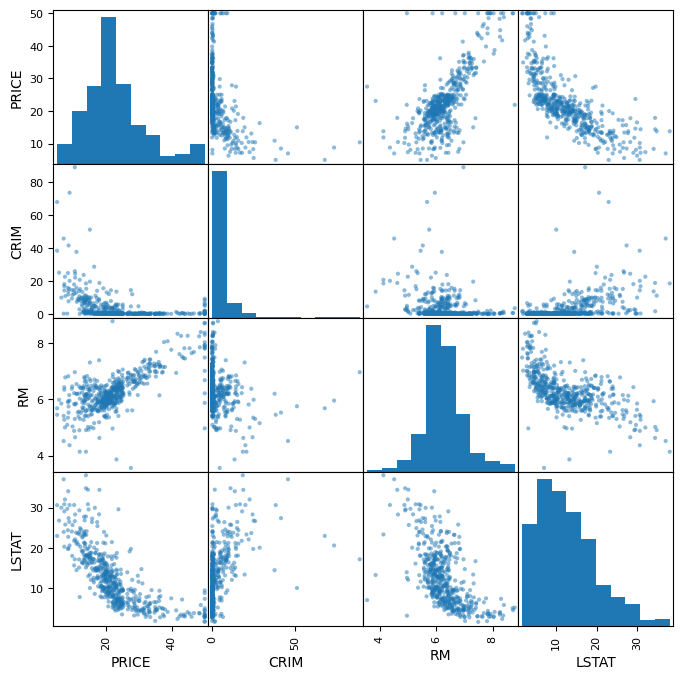

In [3]:
# 주택 가격과 다른 변수들 간의 상관관계 시각화
pd.plotting.scatter_matrix(bostonDF[['PRICE', 'CRIM', 'RM', 'LSTAT']],
                           figsize=(8,8), diagonal='hist')
#주택가격(PRICE), 범죄율(CRIME), 주택당 방 수(RM), 인구 중 하위 계층 비율(LSTAT)
plt.show()

In [4]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 롣 및 전처리
X, y = data, target
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)

In [11]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("데이터 양 체크 >>>", len(X_train))

# 모델 클래스 정의
class LinearRegression(torch.nn.Module):
    def __init__(self, input_n):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_n, 1)

    def forward(self, x):
        out = self.linear(x)
        return out

데이터 양 체크 >>> 404


In [12]:
# 모델 학습
model = LinearRegression(X_train.shape[1])
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0025)

for epoch in range(10000):
    inputs = torch.autograd.Variable(torch.from_numpy(X_train).float())
    labels = torch.autograd.Variable(torch.from_numpy(y_train).float())
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

Epoch 0, Loss: 588.21337890625
Epoch 100, Loss: 220.34030151367188
Epoch 200, Loss: 97.08845520019531
Epoch 300, Loss: 51.35405349731445
Epoch 400, Loss: 34.1398811340332
Epoch 500, Loss: 27.52422523498535
Epoch 600, Loss: 24.890085220336914
Epoch 700, Loss: 23.774045944213867
Epoch 800, Loss: 23.250446319580078
Epoch 900, Loss: 22.967437744140625
Epoch 1000, Loss: 22.78892707824707
Epoch 1100, Loss: 22.660898208618164
Epoch 1200, Loss: 22.560874938964844
Epoch 1300, Loss: 22.47881507873535
Epoch 1400, Loss: 22.40967559814453
Epoch 1500, Loss: 22.350576400756836
Epoch 1600, Loss: 22.299612045288086
Epoch 1700, Loss: 22.255414962768555
Epoch 1800, Loss: 22.216903686523438
Epoch 1900, Loss: 22.183216094970703
Epoch 2000, Loss: 22.15363883972168
Epoch 2100, Loss: 22.127578735351562
Epoch 2200, Loss: 22.104528427124023
Epoch 2300, Loss: 22.084074020385742
Epoch 2400, Loss: 22.065860748291016
Epoch 2500, Loss: 22.049585342407227
Epoch 2600, Loss: 22.03499412536621
Epoch 2700, Loss: 22.02186

In [13]:
# 모델 평가
model.eval()
X_test = torch.autograd.Variable(torch.FloatTensor(X_test))
y_test = torch.autograd.Variable(torch.FloatTensor(y_test))
y_pred = model(X_test)
mse = criterion(y_pred, y_test)
rmse = np.sqrt(mse.item())
print('RMSE:', rmse)

RMSE: 4.837079777565813


In [14]:
# 예측값과 실제값 비교
with torch.no_grad():
    X_sample = X_test[0]
    y_true = y_test[0].item()
    y_pred = model(X_sample).item()
    print(f"실제 집값 = {y_true:.2f}, 예측 집값 : {y_pred:.2f}")

실제 집값 = 28.20, 예측 집값 : 32.57
